# Plotting

Here we'll show a few examples of both how to read data & some of the plotting capabilities available.


First we will look at GITM data, reading it into nparrays & making plots, and then reading it to xarray and showing the advantage xarray has over numpy when it comes to the massive model output files. 

First some setup...



In [1]:
import sys
import os
# Get $HOME from env variables, add ~/SAMI3-GITM-python to $PATH:
sys.path.append(os.path.join(os.environ['HOME'], 'SAMI3-GITM-python'))

In [2]:
from utility_programs import plotting_routines as pr
from utility_programs.read_routines import SAMI, GITM
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

## Reading GITM Data

Really quick, before we read the data in, let's look in the GITM data directory to get an idea of how stuff should be layed out

In [3]:
gpath = os.path.join(os.environ['HOME'], 
                     'scratch/simstorm-20110521/ut_onset_18/run')
gdatadir = os.path.join(gpath, 'UA/data')
rootdir = os.listdir(gpath)
print('Within %s, we have the files:\n\t%s\n\n' %(gpath.split('/')[-1], rootdir),
      'And the model outputs are located within run/UA/data/\n',
      'where we have %i 3DALL and %i 2DANC files ' 
      %(len(glob(gdatadir + '/2DANC*')), 
        len(glob(gdatadir + '/3DALL*'))),
      '(one output file of each type, for each output time-step)\n')

Within run, we have the files:
	['DataIn', 'EIE', 'core', 'GITM.exe', 'restartOUT', 'restartIN', 'pGITM', 'UAM.in', 'UA', 'imf20110519-fake.dat', 'GITM.DONE', 'PostGITM.exe', 'data', 'power.txt']

 And the model outputs are located within run/UA/data/
 where we have 625 3DALL and 625 2DANC files  (one output file of each type, for each output time-step)



Now we'll read the data into numpy arrays... We will read a few time steps of all variables and also many timesteps of a single variable. Note the time that each read takes (shown in the progress bar), to do any of these reads, the programs must open each output file (within the time range specified), even if we just want one variable! So reading multiple time-steps will always take a long time, even if we just want one variable

The GITM.read_bin_to_nparrays() function returns a dictionary with keys as shown below:



In [4]:
print('All variables & 10 times:')

few_times = GITM.read_bin_to_nparrays(gdatadir,
                                      gitm_file_pattern='3DALL*.bin',
                                      start_idx=400,
                                      end_idx=410,
                                      return_vars=True,
                                      progress_bar=True)

print('One variable & 100 times:')

rho_gitm = GITM.read_bin_to_nparrays(gdatadir,
                                      gitm_file_pattern='3DALL*.bin',
                                      cols='Rho',
                                      start_idx=400,
                                      end_idx=500,
                                      return_vars=True,
                                      progress_bar=True)

print("""
In few_times (all variables), we have the keys %s.
And in rho_gitm (one variable), the same keys are present: %s.
      
If we want the times they're stored in the 'gitmdtimes' item as pythonic 
datetimes:
      > few_times['gitmdtimes'] = [%s, %s, [...] , %s]
      
The grid information is in the 'gitmgrid'. 
      > few_times['gitmgrid'].keys() = %s.
This run had %i longitudes, %i latitudes, and %i altitudes.

Note Longitude is from -180 to 180 degrees and altitude is in m, not km      

The values for each of the spatial dimensions (lon, lat, alt) is stored in 
the same shape as the data... few_times['gitmbins'] is stored as a numpy array:
      > few_times['gitmbins'].shape = %s
      
Confusing! But I couldn't come up with a better way to do it.

The indexes correspond to [time, nVar, nLon, nLat, nAlt].

Proof: (nTimes, nVars, nLons, nLats, nAlts) = (%i, %i, %i, %i, %i).

And the variables we have are:
      > few_times['gitmvars'] = %s
      
For reference, the dict with only one variable has the shape:
      > rho_gitm['gitmbins'].shape = %s
      
      """ %(str(few_times.keys()), str(rho_gitm.keys()),
            str(few_times['gitmdtimes'][0]),
            
            str(few_times['gitmdtimes'][1]),
            str(few_times['gitmdtimes'][-1]),
            str(few_times['gitmgrid'].keys()),
            
            len(np.unique(few_times['gitmgrid']['longitude'])),
            len(np.unique(few_times['gitmgrid']['latitude'])),
            len(np.unique(few_times['gitmgrid']['altitude'])),
            
            str(few_times['gitmbins'].shape),
            
            len(few_times['gitmdtimes']),
            len(few_times['gitmvars']),
            len(np.unique(few_times['gitmgrid']['longitude'])),
            len(np.unique(few_times['gitmgrid']['latitude'])),
            len(np.unique(few_times['gitmgrid']['altitude'])),
            
            few_times['gitmvars'],
            
            rho_gitm['gitmbins'].shape
            ))


All variables & 10 times:


100%|██████████| 10/10 [00:43<00:00,  4.37s/it]


One variable & 100 times:


100%|██████████| 100/100 [06:50<00:00,  4.10s/it]


In few_times (all variables), we have the keys dict_keys(['gitmdtimes', 'gitmbins', 'gitmgrid', 'gitmvars']).
And in rho_gitm (one variable), the same keys are present: dict_keys(['gitmdtimes', 'gitmbins', 'gitmgrid', 'gitmvars']).
      
If we want the times they're stored in the 'gitmdtimes' item as pythonic 
datetimes:
      > few_times['gitmdtimes'] = [2011-05-21 09:20:00, 2011-05-21 09:25:00, [...] , 2011-05-21 10:05:00]
      
The grid information is in the 'gitmgrid'. 
      > few_times['gitmgrid'].keys() = dict_keys(['longitude', 'latitude', 'altitude']).
This run had 90 longitudes, 180 latitudes, and 50 altitudes.

Note Longitude is from -180 to 180 degrees and altitude is in m, not km      

The values for each of the spatial dimensions (lon, lat, alt) is stored in 
the same shape as the data... few_times['gitmbins'] is stored as a numpy array:
      > few_times['gitmbins'].shape = (10, 37, 90, 180, 50)
      
Confusing! But I couldn't come up with a better way to do it.

Th

Yeah, it's kind of convoluted. But when you get used to it it's fairly easy to do whatever you want! 

Just need to keep close track of the indices. The hardest part is that the grid info is multi-dimensional. So you need to grab the unique values if you want to make a plot of a certain value. 

For example, to plot a keogram of Rho at Altutude ~350km & Longitude 120:

Text(0.5, 1.0, 'Example Keogram of Rho @ alt=355554 and lon=118')

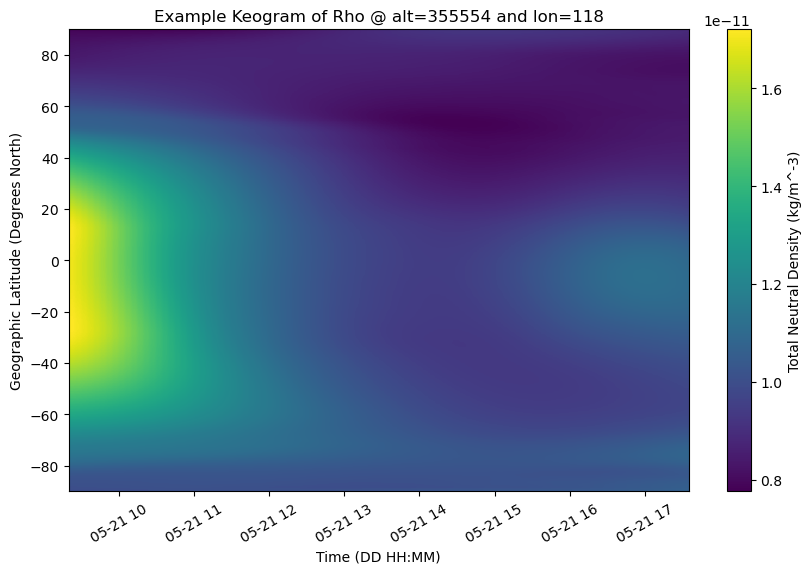

In [5]:
lonvals = np.unique(rho_gitm['gitmgrid']['longitude'])
altvals = np.unique(rho_gitm['gitmgrid']['altitude'])

iLon = np.argmin(np.abs(120-lonvals))
iAlt = np.argmin(np.abs(350*1000-altvals))

# Rho is the only variable we have, but in case it isn't:
iVar = rho_gitm['gitmvars'].index('Rho')

plt.figure(figsize=(10,6))

plt.imshow(rho_gitm['gitmbins'][:, iVar, iLon, :, iAlt].T,
           extent=[rho_gitm['gitmdtimes'][0],
                   rho_gitm['gitmdtimes'][-1],
                   -90, 90], # latitudes are from -90 to 90
           aspect='auto')
plt.colorbar(label='Total Neutral Density (kg/m^-3)')
plt.xticks(rotation=30)
plt.xlabel('Time (DD HH:MM)')
plt.ylabel('Geographic Latitude (Degrees North)')

plt.title('Example Keogram of Rho @ alt=%i and lon=%i' 
          %(int(rho_gitm['gitmgrid']['altitude'][iLon, 0, iAlt]),
            int(rho_gitm['gitmgrid']['longitude'][iLon, 0, iAlt])))


My point is, this is inefficient. And clunky! Let's try the same thing with xarray.

Note, my postprocessed files ended up somewhere else, but this will also work if you have things in the same place


In [6]:
%time gitmds = xr.open_mfdataset(os.path.join(os.environ['HOME'], \
                                    'scratch/postprocessed/GITM*'))
gitmds

CPU times: user 351 ms, sys: 149 ms, total: 501 ms
Wall time: 3.63 s


<xarray.Dataset>
Dimensions:  (time: 625, lon: 90, lat: 180, alt: 50)
Coordinates:
  * time     (time) datetime64[ns] 2011-05-20 ... 2011-05-22T04:00:00
  * lon      (lon) float64 2.0 6.0 10.0 14.0 18.0 ... 346.0 350.0 354.0 358.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * alt      (alt) float64 100.0 101.7 103.5 105.4 ... 684.6 706.7 729.0 751.5
Data variables:
    Rho      (time, lon, lat, alt) float64 dask.array<chunksize=(625, 90, 180, 50), meta=np.ndarray>

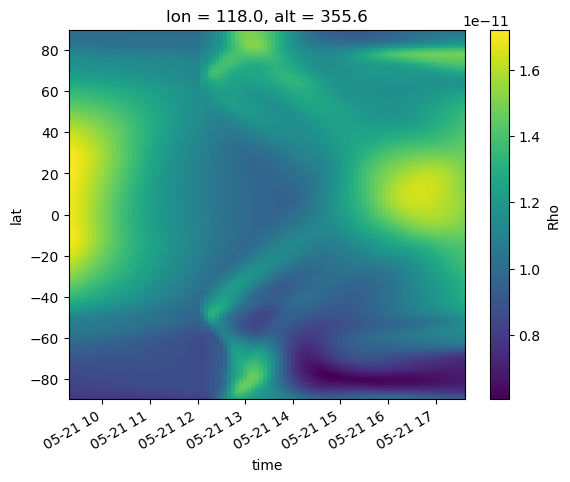

In [7]:
# Same plot as above, with a lot less effort...

gitmds.Rho.isel(time=slice(400,500)).sel(lon=120, alt=350, method='nearest').plot(x='time')

Wow! much easier!! and faster... We just read **all** times from the run! This is because we're using Dask, which allows for "lazy loading", so we do not need to actually hold the data im memory to compute on it. So we can do really complex computations and use a fraction of the memory needed to hold the data in memory, or really easily run big computations in parallel. I can provide more details on hiow this works, or check out [the documentation](https://docs.xarray.dev/en/stable/user-guide/dask.html)

Now on to

## Plotting Routines

We'll just run through and make a plot or two using each function documented. The only function that will not work on post-processed GITM & SAMI data is draw_field_line_plot, that needs be run on pre-processed (or post-processed RAW) SAMI data, or things will look really weird. The function should be self-explanitory enough though.

> These first two work for both numpy arrays and xarrays


I'm only showing the most basic example of each. There are a lot of options in each, the exploration of which is left to the user.

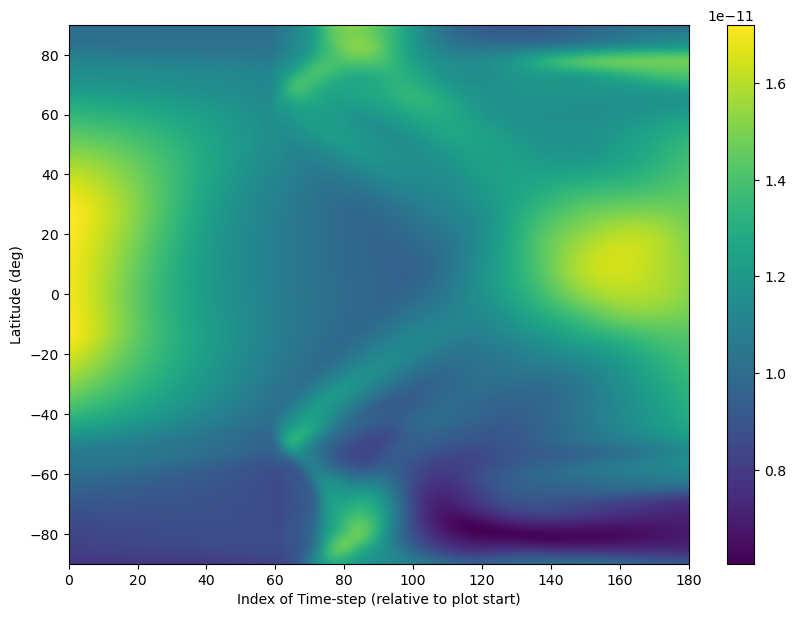

In [8]:
pr.make_a_keo(gitmds.Rho.isel(time=slice(400,500)).sel(lon=120, alt=350, method='nearest').values, cbarlims=[None, None], save_or_show='show')

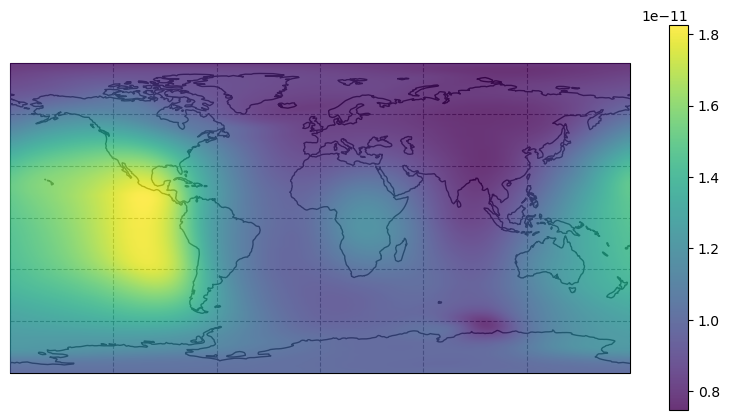

In [9]:
pr.draw_map(gitmds.Rho.isel(time=420).sel(alt=350, method='nearest'),
            cbarlims=[None, None], save_or_show='show')

I couldn't get the labels to show up on this plot. I'll update it if I can fix it one day.

Now for the xarray exclusive plots:


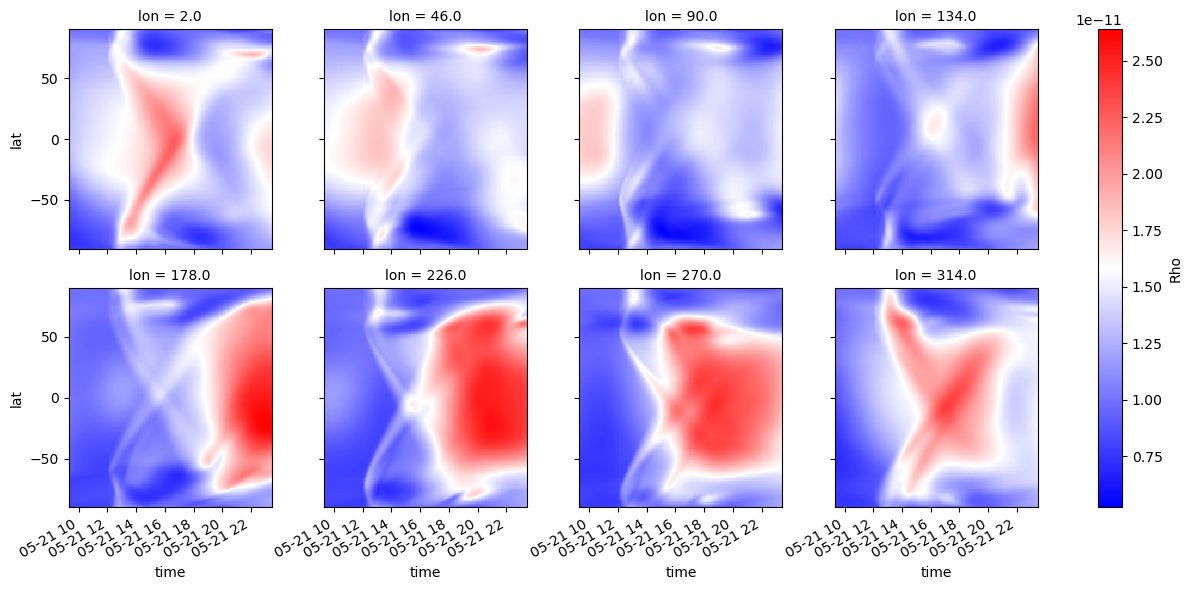

In [10]:
pr.panel_plot(gitmds.Rho.sel(alt=350, method='nearest').isel(time=slice(400, 570)))

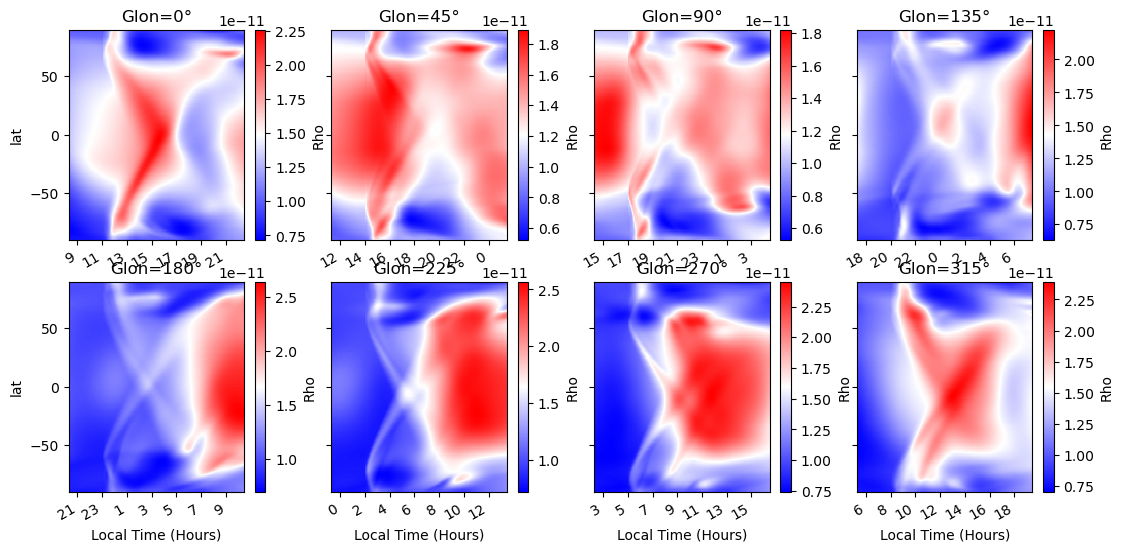

In [11]:
pr.panel_with_lt(gitmds.Rho.sel(alt=350, method='nearest').isel(time=slice(400, 570)))

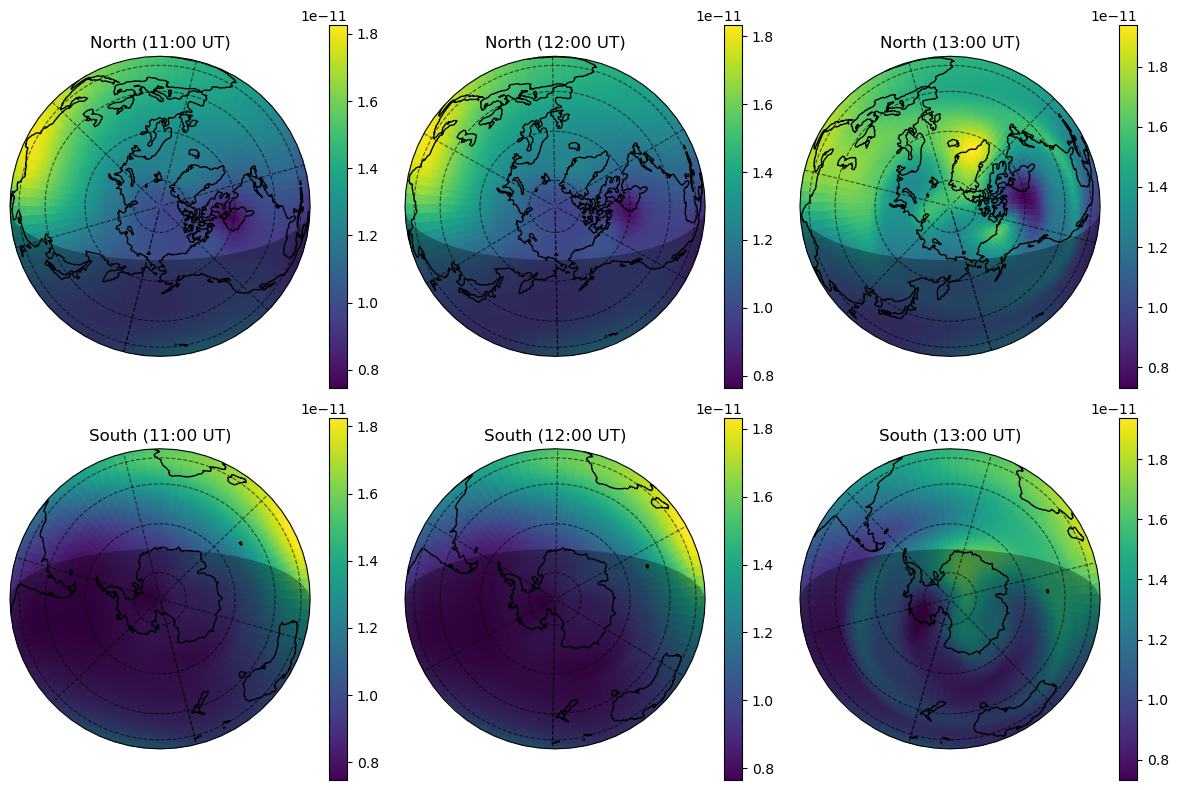

In [12]:
# Polar dials! - works best for Joule heating, but this is OK for an example

pr.loop_panels(gitmds.Rho.sel(alt=350, method='nearest').isel(time=slice(400, 570)), 3, '2011-05-21 11');

One is not shown here, map_and_dials. It's easy, just do the same as everything else but pass an array for the dials, the total number of plots, and a dataarray for the maps. 


It'll be added one day...